<img src="images/thro.png" align="right"> 
# A2I2 - Artificial Neural Networks (ANN)

## Lecture

---
## Step 2: Data Understanding and Data Preparation

### <span style="color:blue">Business Problem: </span> Cardiotocography Evaluation

During pregnancy, many doctors perform "fetal cardiotocograms", recording the heartbeat and other measurements of the fetus in order to assess fetal wellbeing. 

### <span style="color:blue">Understanding the business</span>

**Cardiotocography**
* The recorded data is quite hard to interpret, ideally a group if experts is doing the evaluation. However, quite often, this is not possible and a single doctor has to do the interpretation alone.

### <span style="color:blue">Mapping to Data Science Problems and Methods</span>

* Automatically interpret cardiotocography data to assess fetal health (classification)


### <span style="color:blue">Understanding the data</span>

We will be using the Cardiotocography Dataset from *Marques de SÃ¡, J.P., Biomedical Engineering Institute, Porto, Portugal. Bernardes, J., Faculty of Medicine, University of Porto, Portugal. Ayres de Campos, D., Faculty of Medicine, University of Porto, Portugal.*

The datasets consists of 2126 instances, and has 21 attributes plus the class label NSP.

Attribute Information:
<pre>
LB - FHR baseline (beats per minute)
AC - # of accelerations per second
FM - # of fetal movements per second
UC - # of uterine contractions per second
DL - # of light decelerations per second
DS - # of severe decelerations per second
DP - # of prolongued decelerations per second
ASTV - percentage of time with abnormal short term variability
MSTV - mean value of short term variability
ALTV - percentage of time with abnormal long term variability
MLTV - mean value of long term variability
Width - width of FHR histogram
Min - minimum of FHR histogram
Max - Maximum of FHR histogram
Nmax - # of histogram peaks
Nzeros - # of histogram zeros
Mode - histogram mode
Mean - histogram mean
Median - histogram median
Variance - histogram variance
Tendency - histogram tendency
NSP - fetal state class code (1=normal; 2=suspect; 3=pathologic)
</pre>

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ctg_raw = pd.read_csv('data/CTG.csv', delimiter=';', decimal=",")
ctg_raw

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120.0,0.00,0.0,0.00,0.0,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.01,0.0,0.01,0.0,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.00,0.0,0.01,0.0,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.00,0.0,0.01,0.0,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.01,0.0,0.01,0.0,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.00,0.0,0.01,0.0,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.00,0.0,0.01,0.0,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.00,0.0,0.01,0.0,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.00,0.0,0.01,0.0,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [4]:
ctg_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
LB,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.00,160.00
AC,2126.0,0.003170,0.004881,0.0,0.0,0.0,0.01,0.02
FM,2126.0,0.009356,0.046894,0.0,0.0,0.0,0.00,0.48
UC,2126.0,0.004991,0.005011,0.0,0.0,0.0,0.01,0.02
DL,2126.0,0.001825,0.003900,0.0,0.0,0.0,0.00,0.02
DS,2126.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.00
DP,2126.0,0.000014,0.000375,0.0,0.0,0.0,0.00,0.01
ASTV,2126.0,46.990122,17.192814,12.0,32.0,49.0,61.00,87.00
MSTV,2126.0,1.332785,0.883241,0.2,0.7,1.2,1.70,7.00
ALTV,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.00,91.00


In [5]:
ctg_raw.NSP.value_counts().sort_index()

1.0    1655
2.0     295
3.0     176
Name: NSP, dtype: int64

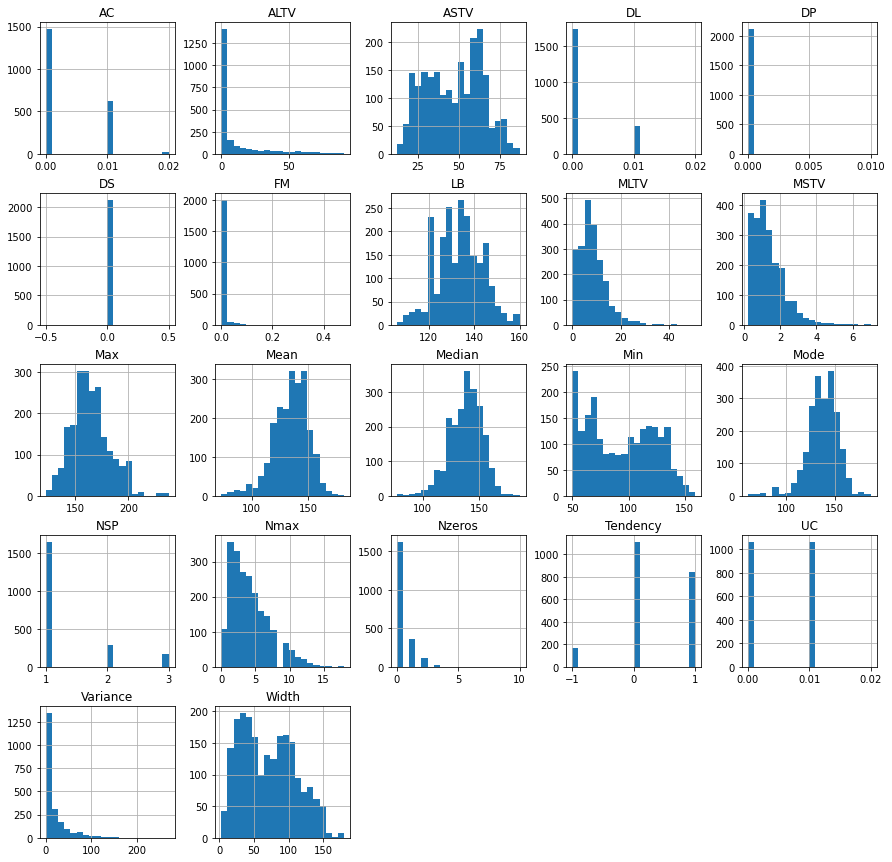

In [6]:
_ = ctg_raw.hist(bins=20, figsize=(15,15))

In [7]:
ctg_sel = ctg_raw[['ALTV', 'ASTV', 'LB', 'MLTV', 'MSTV', 'Max', 'Mean', 
                   'Median', 'Min', 'Mode', 'Nmax', 'Variance', 'Width', 'NSP']]

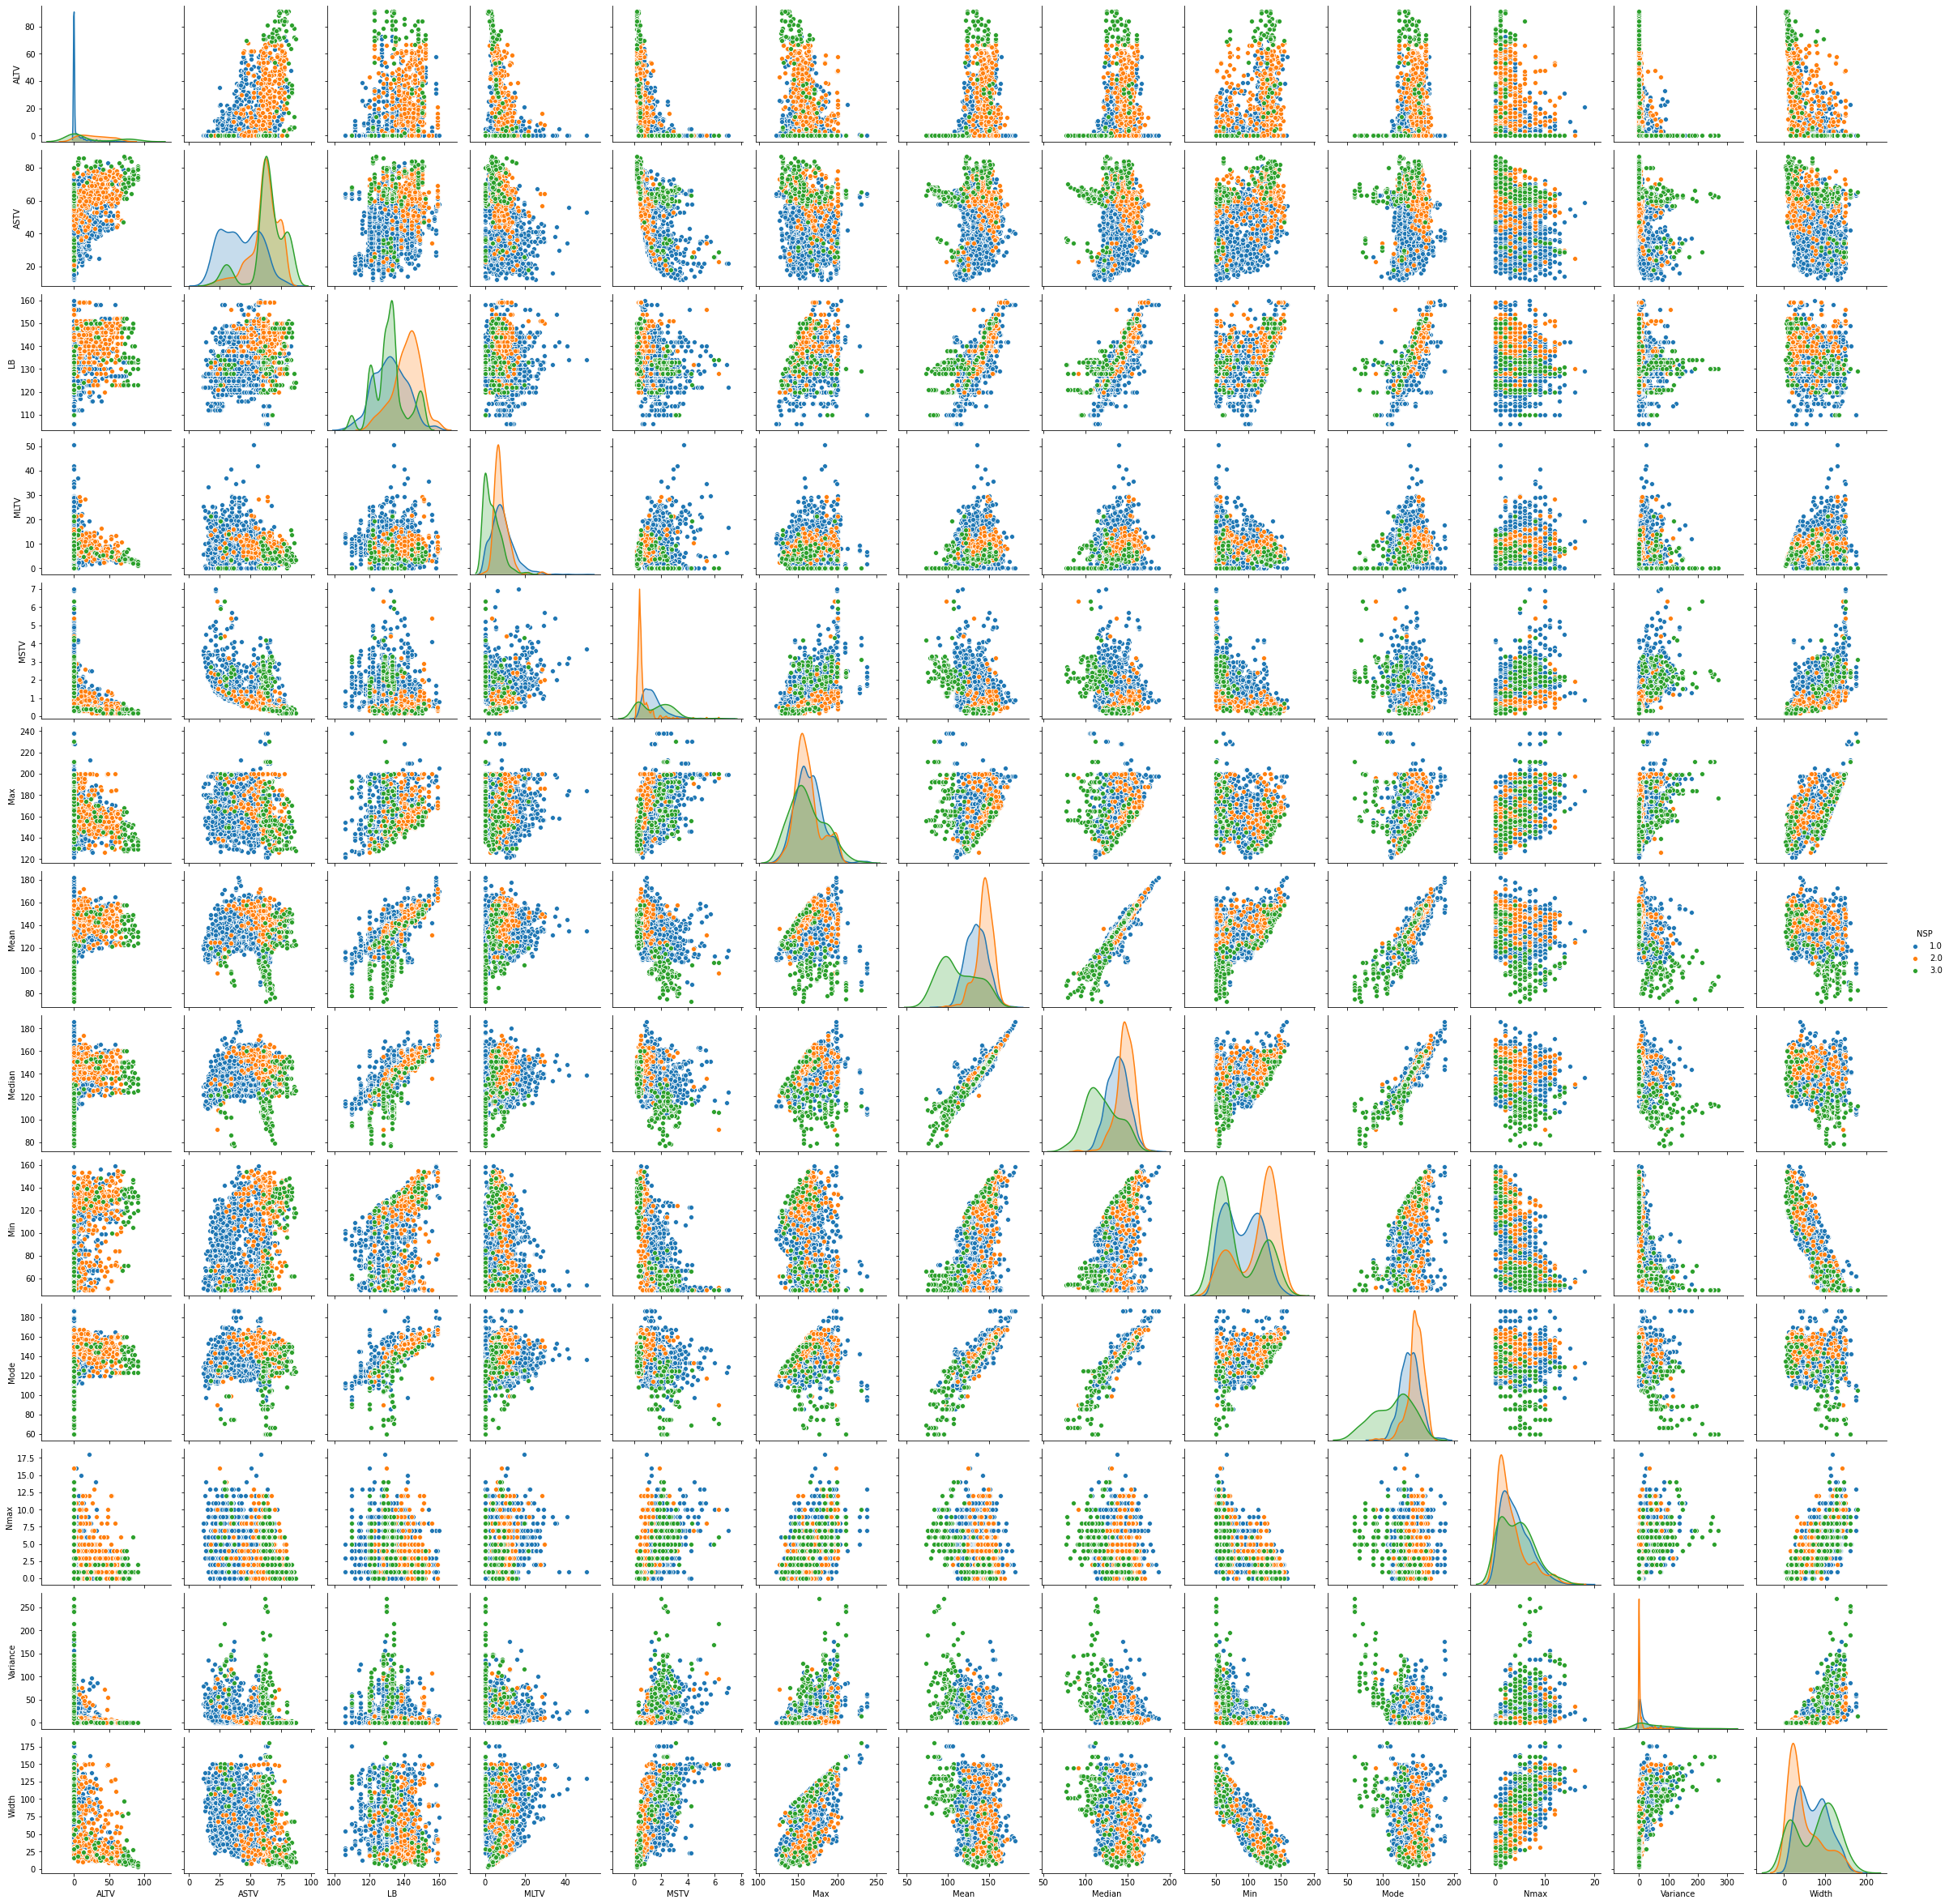

In [8]:
_=sns.pairplot(ctg_sel, hue='NSP')

In [9]:
ctg_raw.Nmax.value_counts().sort_index()

0.0     107
1.0     357
2.0     331
3.0     269
4.0     258
5.0     210
6.0     158
7.0     145
8.0     106
9.0      67
10.0     49
11.0     28
12.0     22
13.0     10
14.0      5
15.0      1
16.0      2
18.0      1
Name: Nmax, dtype: int64

### <span style="color:blue">Data Preparation</span>

In [1]:
# check how many cells are nan/null

In [2]:
# output all rows with nan values

In [3]:
# with dropna we could remove all tuples with nan values (but we do not have any here)

In [4]:
# a common defition of outliers is: 
# all values more than 3 times the standard deviation from the mean
# check for the "outlier condition":

In [23]:
# --- EOF ---